# Desafío - Pruebas de hipótesis

1. Evaluar juicios de hipótesis
 
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

# LGBT Case

Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos

HET: Porcentaje de heterosexuales que se mostró a favor de la adopción homoparental

HOM: Porcentaje de homosexuales que se mostró a favor de la adopción homoparental

*Definición de hipótesis nula y alternativa:*

Ho: HET == HOM

Ha: HET != HOM

# a) ¿Es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?

In [1]:
p_value = 0.1183
nivel_de_confianza = 0.95
alpha = 1-nivel_de_confianza

In [2]:
p_value < alpha

False

Por tanto *NO* es posible rechazar la hipotesis nula en favor de la alternativa

# b) ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

x = confianzamáximaconlaqueseríaposiblerechazarlahipótesisnula

Se rechaza la hipótesis nula cuando se cumple: 

p_value < 1 - x

In [3]:
print("despejando x el resultado sería:")
print("x < 1 - 0.1183")

despejando x el resultado sería:
x < 1 - 0.1183


In [4]:
print(f"Con un nivel de confianza de {(1-p_value)*100}% es la máxima confianza con la que se podría rechazar la hipotesis nula")

Con un nivel de confianza de 88.17% es la máxima confianza con la que se podría rechazar la hipotesis nula


# 2. Importe la base de datos utilizada la sesión presencial anterior

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("nations.csv").drop(columns = 'Unnamed: 0')
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


# a) Agregue una serie de variables binarias por cada continente de la variable region.
○ Tip: Utilice <code>np.where</code> para ello.

In [15]:
for i in df['region'].unique():
    df[i] = np.where(df['region'] == i, 1,0)
df.tail()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
189,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN,0,0,0,0,1
190,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN,0,0,0,0,1
191,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN,0,0,0,0,1
192,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN,0,0,0,0,1
193,Vanuatu,Oceania,3809.800049,6.700000,54.000000,17.75,69.966667,225317,24.500000,0.8988,82.000000,1.50,NaN,0,0,0,0,1


# b) De manera similar a la sesión anterior, enfóquese en las siguientes variables:
○ Apellidos desde la A hasta la N: Enfocarse en las variables <code>chldmort, adfert</code> y <code>life</code>.

○ Apellidos desde la N hasta la Z: Enfocarse en las variables <code>femlab, literacy</code> y <code>school</code>.

In [16]:
df = df[['country','region','femlab', 'literacy', 'school', "Africa", "Americas", "Asia", "Europe" ,"Oceania"]]
df.head()

,country,region,femlab,literacy,school,Africa,Americas,Asia,Europe,Oceania
0,Algeria,Africa,0.4522,72.599998,6.716667,1,0,0,0,0
1,Benin,Africa,0.8482,41.700001,3.100000,1,0,0,0,0
2,Botswana,Africa,0.8870,84.099998,8.600000,1,0,0,0,0
3,Burkina Faso,Africa,0.8584,23.600000,1.300000,1,0,0,0,0
4,Burundi,Africa,1.0344,66.599998,2.483333,1,0,0,0,0


# 3. Implemente una función de prueba de hipótesis a mano

● La función debe ingresar los siguientes argumentos:

    ○ df: La tabla de datos.
    ○ variable: La variable a analizar.
    ○ binarize: El indicador binario a utilizar.

●Tips:

    ○ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
    ○ Implemente ttest_ind de scipy.stats y guarde el valor "t" y "pval".
    ○ Reporte las medias para cada grupo (0 y 1).
    ○ Reporte la diferencia de entre las medias.
    ○ Reporte los valores t y p

In [8]:
def funcion3(df, variable, binarize):
    #Con Indicador Binario se refiere a la columna binaria a utilizar para comprar con el resto de las regiones,
    #Es decir, se refiere a la región a comparar con el resto de regiones.
    
    #Dropeo Na's según la variable elegida
    df = df.dropna(subset = [variable])
    
    #Separado en 2 grupos para tener 2 set de datos segmentados según la variable binarize elegida
    grupo0 = df[df[binarize] == 0][variable]
    grupo1 = df[df[binarize] == 1][variable]
    
    #Hago t_test y guardo los valores
    t , pval = stats.ttest_ind(grupo0,grupo1) #por defecto compara medias y hace ttest con 2 colas
    
    #reporto las medias y la diferencia entre ellas
    print(f"La media para el grupo 0 es {np.mean(grupo0)}")
    print(f"La media para el grupo 1 es {np.mean(grupo1)}")
    print(f"La diferencia entre las medias es de : {abs(np.mean(grupo0)-np.mean(grupo1))}")
    print("*****************")
    
    #reporte valores t y p
    print(f"El valor t del test es {t}")
    print(f"El valor pvalue del test es {pval}")

funcion3(df,'literacy','Americas')

La media para el grupo 0 es 80.18217380357825
La media para el grupo 1 es 89.30124988555909
La diferencia entre las medias es de : 9.119076081980836
*****************
El valor t del test es -1.953805549546212
El valor pvalue del test es 0.05282297025501065


# 4.Implemente una función que grafique los histogramas para ambas muestras.

Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente
    
    ○ Tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.

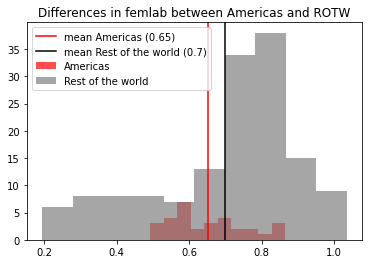

Con un nivel de confianza de 82.85%, se puede decir que las medias son distintas
************************************************************************************************


In [26]:
def funcion4(df, variable, binarize, alpha, label):
    #Con Indicador Binario se refiere a la columna binaria a utilizar para comprar con el resto de las regiones,
    #Es decir, se refiere a la región a comparar con el resto de regiones.
    
    #Dropeo Na's según la variable elegida
    df = df.dropna(subset = [variable])
    
    #Separado en 2 grupos para tener 2 set de datos segmentados según la variable binarize elegida
    grupo0 = df[df[binarize] == 0][variable]
    grupo1 = df[df[binarize] == 1][variable]
    
    plt.hist(grupo1, alpha = alpha, color = 'red', label = label[0])
    plt.axvline(np.mean(grupo1), color = 'red', label = f"mean {label[0]} ({round(np.mean(grupo1),2)})")
    
    plt.hist(grupo0, alpha = alpha, color = 'gray', label = label[1])
    plt.axvline(np.mean(grupo0), color = 'black', label = f"mean {label[1]} ({round(np.mean(grupo0),2)})")
    plt.title(f"Differences in {variable} between {binarize} and ROTW")
    plt.legend()
    plt.show()
    
    print(f"Con un nivel de confianza de {round(100-stats.ttest_ind(grupo0,grupo1)[1]*100,2)}%, se puede decir que las medias son distintas")
    print("************************************************************************************************")
funcion4(df,'femlab','Americas', alpha = 0.7, label = ['Americas','Rest of the world'])

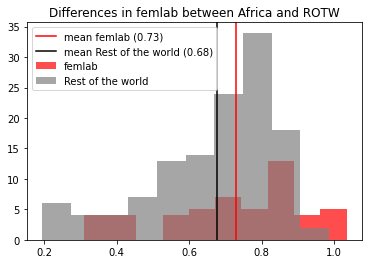

Con un nivel de confianza de 92.38%, se puede decir que las medias son distintas
************************************************************************************************


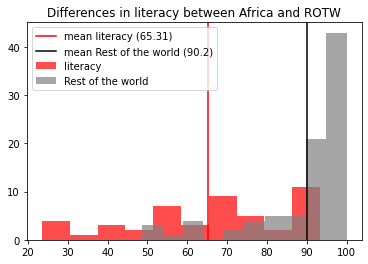

Con un nivel de confianza de 100.0%, se puede decir que las medias son distintas
************************************************************************************************


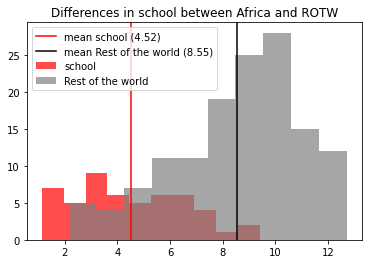

Con un nivel de confianza de 100.0%, se puede decir que las medias son distintas
************************************************************************************************


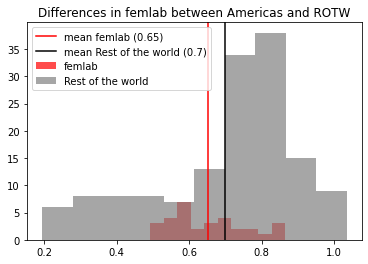

Con un nivel de confianza de 82.85%, se puede decir que las medias son distintas
************************************************************************************************


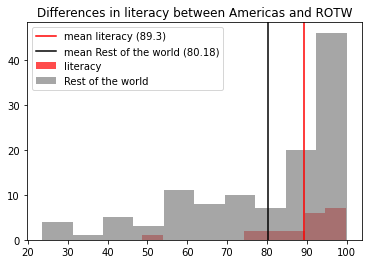

Con un nivel de confianza de 94.72%, se puede decir que las medias son distintas
************************************************************************************************


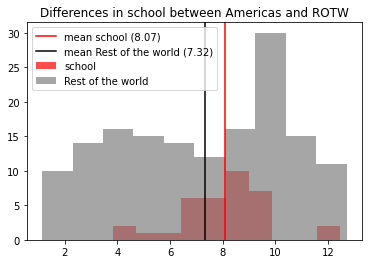

Con un nivel de confianza de 82.54%, se puede decir que las medias son distintas
************************************************************************************************


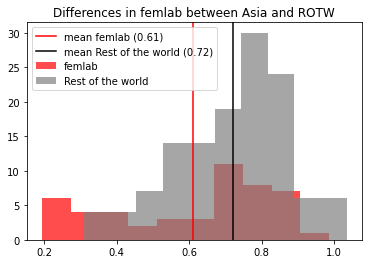

Con un nivel de confianza de 99.98%, se puede decir que las medias son distintas
************************************************************************************************


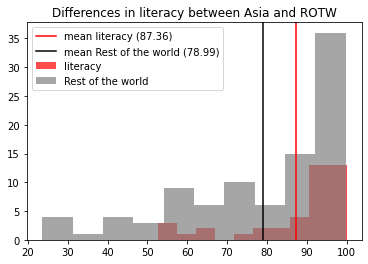

Con un nivel de confianza de 97.89%, se puede decir que las medias son distintas
************************************************************************************************


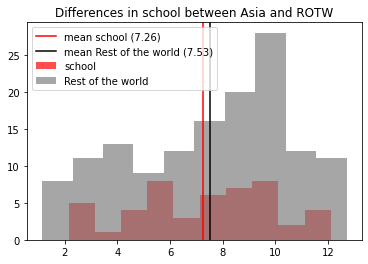

Con un nivel de confianza de 40.77%, se puede decir que las medias son distintas
************************************************************************************************


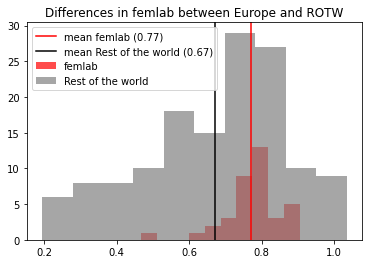

Con un nivel de confianza de 99.75%, se puede decir que las medias son distintas
************************************************************************************************


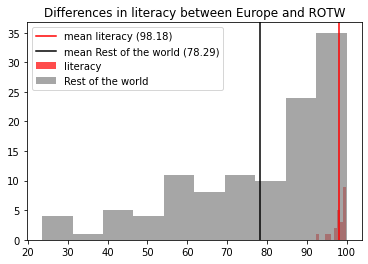

Con un nivel de confianza de 100.0%, se puede decir que las medias son distintas
************************************************************************************************


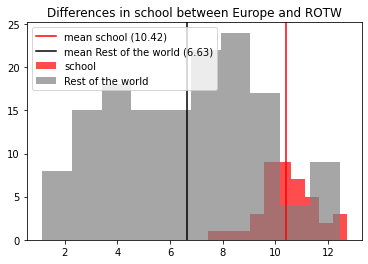

Con un nivel de confianza de 100.0%, se puede decir que las medias son distintas
************************************************************************************************


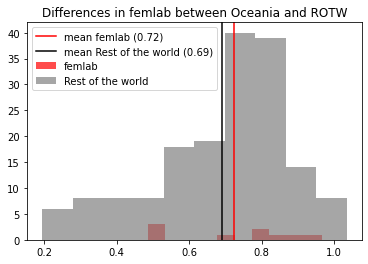

Con un nivel de confianza de 40.64%, se puede decir que las medias son distintas
************************************************************************************************


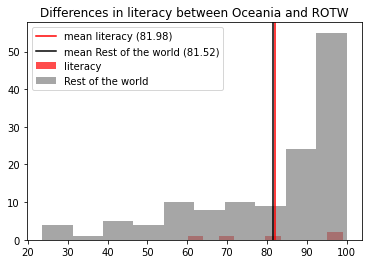

Con un nivel de confianza de 4.15%, se puede decir que las medias son distintas
************************************************************************************************


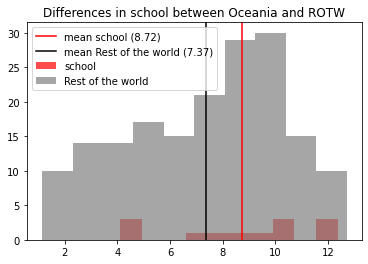

Con un nivel de confianza de 88.71%, se puede decir que las medias son distintas
************************************************************************************************


In [27]:
for i in ["Africa", "Americas", "Asia", "Europe" ,"Oceania"]:
    for j in ['femlab', 'literacy', 'school']:
        funcion4(df,j,i, alpha = 0.7, label = [j,'Rest of the world'])

In [28]:
print("""
Los casos interesantes son:

África:
Para las 3 variables, se puede decir con un nivel de confianza sobre el 90% que áfrica es distinto al resto de las regiones

Américas:
Para las 3 variables, se puede decir con un nivel de confianza sobre el 82% que áfrica es distinto al resto de las regiones

Asia:
Sólo para la variable School, Asia mostró dudas sobre que su media sea diferente a la media del resto de las regiones,
para todo el resto, con sobre un 97% de confianza las medias son distintas al resto de las regiones

Europa:
Europa con casi 100% de confianza en las 3 variables, se puede decir que son distintos a la media del resto de las regiones

Oceanía:
Oceanía en Literacy se puede decir con un alto nivel de confianza de que sus medias son IGUALES a la media del resto de las regiones
Para el resto no se puede decir nada con sobre un 90% de confianza.
""")


Los casos interesantes son:

África:
Para las 3 variables, se puede decir con un nivel de confianza sobre el 90% que áfrica es distinto al resto de las regiones

Américas:
Para las 3 variables, se puede decir con un nivel de confianza sobre el 82% que áfrica es distinto al resto de las regiones

Asia:
Sólo para la variable School, Asia mostró dudas sobre que su media sea diferente a la media del resto de las regiones,
para todo el resto, con sobre un 97% de confianza las medias son distintas al resto de las regiones

Europa:
Europa con casi 100% de confianza en las 3 variables, se puede decir que son distintos a la media del resto de las regiones

Oceanía:
Oceanía en Literacy se puede decir con un alto nivel de confianza de que sus medias son IGUALES a la media del resto de las regiones
Para el resto no se puede decir nada con sobre un 90% de confianza.

